# 워드클라우드

In [1]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

### Alice in Wonderland

In [85]:
text = open('./data/wc1.alice.txt').read()
alice_mask = np.array(Image.open('./data/wc2.alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [86]:
len(STOPWORDS)

192

In [87]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [88]:
len(stopwords)

193

In [89]:
import matplotlib as mpl
import matplotlib.pyplot as plt

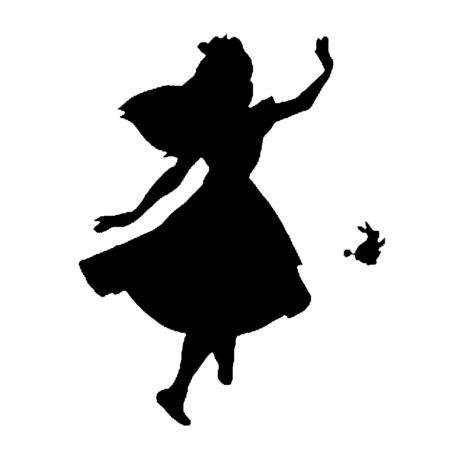

In [90]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [91]:
# stopword 제거
text_ = [word for word in text.split() if word.lower() not in stopwords]
text = ' '.join([str(elem) for elem in text_])

In [92]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.25956284153005466,
 'know': 0.2459016393442623,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'now': 0.16393442622950818,
 'went': 0.15846994535519127,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'well': 0.14754098360655737,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'head': 0.13114754098360656,
 'What': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Mouse': 0.12021857923497267,
 'Duchess': 0.11

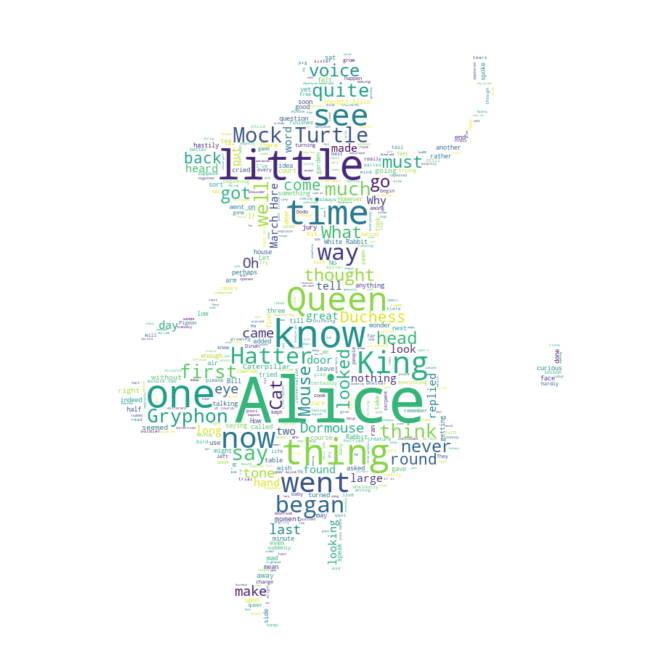

In [93]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


###  Star Wars - A new hope

In [78]:
text = open('./data/wc3.a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('./data/wc4. stormtrooper_mask.png'))

In [79]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [80]:
# stopword 제거
text_ = [word for word in text.split() if word.lower() not in stopwords]
text = ' '.join([str(elem) for elem in text_])

In [81]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [82]:
# HSL : 색조(hue), 포화(saturation, 밝기(lightness)
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

In [83]:
s = 'hsl(0, 0%%, %d%%)' % random.randint(60,100)
s

'hsl(0, 0%, 83%)'

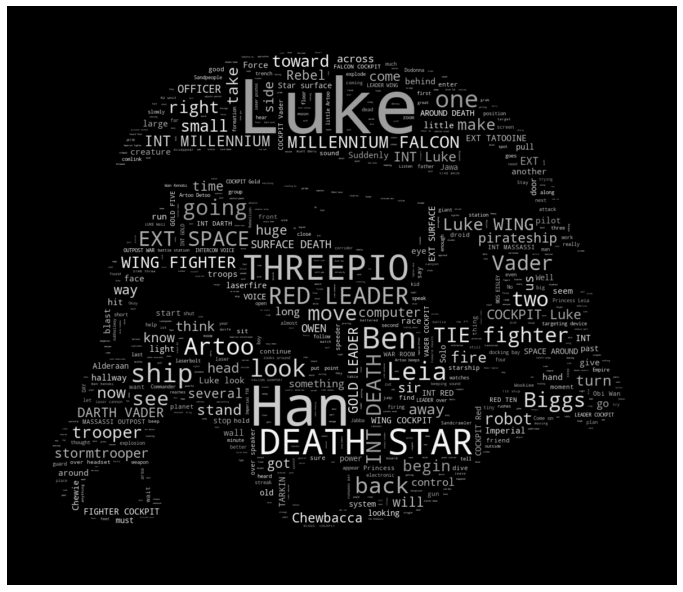

In [84]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

### 여자 친구 선물 고르기

In [49]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [100]:
tmp1 = 'https://kin.naver.com/search/list.nhn?'
html = tmp1 + 'query={key_word}&page={num}'
## https://kin.naver.com/search/list.nhn?query=%EC%97%AC%EC%B9%9C%20%EC%84%A0%EB%AC%BC&page=1
response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))
soup = BeautifulSoup(response, "html.parser")
tmp = soup.find_all('dl')

In [101]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list[:5]

['\n\n천여여친 선물 추\n\n2020.06.22.\n천여여친 선물 추  저는 조금 특별한 선물 추천 드립니다 저도 흔한 선물을 다... 특별한선물 여친선물 : DAON FLOWER [DAON FLOWER] 꽃과 향을 선물하다. DAON smartstore.... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 6\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n여친선물로 뭘 줘야 할까요?\n\n2020.05.21.\n여친선물로 뭘 줘야 할까요?  안녕하세요 저는 종로3가에서 귀금속을 하고 있는 예문입니다 어떤 특별한 날인가요 그러면 특별하게 선물을 주시는 게 좋을 거 같아서요 기념이... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 8\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n아빠가 어제 카드 주셔서 여친 선물\n\n2020.02.04.\n아빠가 어제 카드 주셔서 여친 선물 사는데에 20만원 썼거든요?? 근데 여친이 또 사달라는게 있는데 그게 30만원이에요... 근데 또 돈쓰면 아빠가 뭐라 할것같고 안사주면... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 8\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n정품문의 답변즘여 여친선물인데....\n\n2020.01.29.\n... 여친선물이에요... 꼼꼼히... 부탁... 드립니다... 감사합니다. 구매처링크와 제품모델명택, 자물쇠 각인도 올려주세요 꼼꼼히 확인하기엔 부족한 사진이 너무 많네요; \n\nQ&

In [68]:
from tqdm import tqdm_notebook

present_candi_text = []
for n in tqdm_notebook(range(1, 1000, 10)):  ## 1000page까지 10개씩
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    for line in tmp:
        line_str = line.text.replace('/t','').replace('\n','') ##   /t, \n 제거
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [102]:
with open("data/wc6_present_candi.txt", "w", -1, 'utf-8') as f:
    for line in present_candi_text:
        f.write(line+'\n')

In [103]:
present_candi_text[:10]

['\n\n여자친구 선물해주려구요\n\n2020.06.03.\n여자친구가 첨으로 독립을 하게되서 축하기념으로 선물하려하는데요 여자친구 선물은... 사양해요  여자친구 선물로 좀 특별한걸 선물해주세요 보면 생각이 자주나는걸로요... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 가족행사, 이벤트\n|\n답변수 5\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n20대여자친구선물 하카 전자담배... \n\n2020.06.18.\n... 전자담배 중에 20대여자친구선물로 줄만한 것 찾고 있는데 하카 전자담배는 어떨지 궁금합니다.  안녕하세요 20대여자친구선물 하카 전자담배는 어떤지 고민중이시군요!... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 술, 담배\n|\n답변수 2\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n여자친구 선물 추천 부탁드립니다.(목걸이)\n\n2020.06.06.\n안녕하세요 여자친구 선물로 목걸이를 선물하고 싶어서 이렇게 글을 올립니다. 제가 쥬얼리 쪽은 브랜드가 어떻게 되어 있는지 잘 몰라서요. 20대 중반 저랑 동갑인... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 목걸이, 펜던트\n|\n답변수 6\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n여자친구 선물 추천 부탁드려요~\n\n2020.01.20.\n저기요...여자친구 선물 추천 좀 해 주세요~ 너무... 괜찮은 여자친구 선물 추천 부탁드립니다~  요즘 겨울이라서... 저는 여자친구 선물 추천으로 천연 성분으로 된 스킨, 로션이... \n\nQ&A\n\t\t\t

In [104]:
len(present_candi_text)

1000

In [105]:
present_text = ''

for each_line in present_candi_text:
    present_text = present_text + each_line + '\n'

In [106]:
from konlpy.tag import Okt
okt = Okt()

In [107]:
gifts = okt.nouns(present_text)
gifts[:10]

['여자친구', '선물', '여자친구', '독립', '축하', '기념', '선물', '여자친구', '선물', '양해']

In [108]:
# Natural Language Toolkit
import nltk

In [112]:
gifts = nltk.Text(gifts, name='여자 친구 선물')
print(len(gifts.tokens))
print(len(set(gifts.tokens)))

23583
682


In [113]:
gifts.vocab().most_common(100)

[('선물', 2995),
 ('여자친구', 2945),
 ('목걸이', 2607),
 ('답변', 1031),
 ('수', 1005),
 ('추천', 938),
 ('때', 878),
 ('중', 866),
 ('용', 865),
 ('참고', 860),
 ('하트', 860),
 ('다이아', 859),
 ('티니', 859),
 ('인기', 858),
 ('완전', 856),
 ('연애', 516),
 ('결혼', 378),
 ('고민', 286),
 ('이성', 136),
 ('상담', 136),
 ('쥬니버', 133),
 ('네이버', 129),
 ('용법', 129),
 ('가족', 86),
 ('이벤트', 86),
 ('행사', 83),
 ('내공', 83),
 ('고', 73),
 ('초', 72),
 ('문구', 69),
 ('만년필', 67),
 ('미술', 67),
 ('용품', 67),
 ('중학생', 64),
 ('좀', 46),
 ('제', 37),
 ('화장품', 35),
 ('뭐', 31),
 ('생각', 26),
 ('걸', 21),
 ('생일', 21),
 ('화이트데이', 21),
 ('요', 20),
 ('저', 18),
 ('이번', 17),
 ('가격', 17),
 ('것', 16),
 ('여자', 16),
 ('지갑', 16),
 ('거', 15),
 ('크리스마스', 15),
 ('로', 14),
 ('질문', 13),
 ('향수', 13),
 ('게', 12),
 ('뭘', 11),
 ('반지', 11),
 ('감동', 10),
 ('꽃', 10),
 ('정도', 10),
 ('쇼핑', 10),
 ('커플', 10),
 ('브랜드', 9),
 ('진짜', 9),
 ('의미', 9),
 ('곧', 9),
 ('살', 9),
 ('전', 9),
 ('목도리', 9),
 ('중반', 8),
 ('이제', 8),
 ('팔찌', 8),
 ('줄', 7),
 ('기초', 7),
 ('귀걸이', 7),
 ('달', 7),
 (

In [116]:
sw_text = ' '.join([str(elem) for elem in gifts.tokens])
print(sw_text)

여자친구 선물 여자친구 독립 축하 기념 선물 여자친구 선물 양해 여자친구 선물 좀 걸 선물 생각 로 가족 행사 이벤트 답변 수 여자친구 선물 하카 전자담배 전자담배 중 여자친구 선물 줄 것 하카 전자담배 여자친구 선물 하카 전자담배 고민 군 술 담배 답변 수 여자친구 선물 추천 목걸이 여자친구 선물 목걸이 선물 글 제 쥬얼리 쪽 브랜드 중반 저 동갑 목걸이 펜던트 답변 수 여자친구 선물 추천 저기 여자친구 선물 추천 좀 해 여자친구 선물 추천 요즘 겨울 저 여자친구 선물 추천 천연 성분 스킨 로션 가족 행사 이벤트 답변 수 여자친구 선물 여자친구 선물 로즈데이 장미 외 선물 수 게 연애 초 여러가지 기념일 저 조금 선물 가족 행사 이벤트 답변 수 여자친구 선물 감동 뭐 여자친구 선물 감동 것 좀 여자친구 선물 고민 제 여자 친구 선물 값 선물 목걸이 펜던트 답변 수 여자친구 선물 감동 여자친구 선물 질문 자 글 여자친구 선물 옷 신발 것 화장품 기초 화장품 세트 여자친구 선물 제일 것 가족 행사 이벤트 답변 수 여자친구 선물 선물 선물 향수 거도 포함 거 선물 추천 질문 자 여자친구 생일 선물 고민 속옷 답변 수 답변 볶음 여자친구 선물 개 추천 좀 여자친구 선물 거 개 추천 그 그동안 여자친구 선물 함 향수 시계 목걸이 여자친구 선물 경우 실용 걸 경우 가족 행사 이벤트 답변 수 답변 여자친구 선물 뷰티 팩트 선 여자친구 선물 뷰티 팩트 선물 지금 제 메이크업 포에버 여자친구 선물 추천 사이트 여자 기초 화장 답변 수 중반 여자친구 선물 추천 부탁 중반 여자친구 선물 추천 여자친구 그동안 게 추천 여자친구 선물 저 아이템 추천 연애 결혼 답변 수 여자친구 선물 추천 이요 다이어트 도움 줄 수 여자친구 선물 여자친구 선물 추천 요즘 다이어트 여자친구 선물 추천 용 것 생각 연애 결혼 답변 수 답변 여자친구 선물 뭐 여자친구 선물 고민 종류 여러가지 생각 향수 이벤트 여자친구 선물 감동 여자친구 선물 추천 연애 결혼 답변 수 화이트데이 선물 여자친구 선물 추천 

In [119]:
sw_text = """별로 생일 반 직업 고생 취미 도대체 군대 쪼금 여친 재료 곳 노미 호 만원 인 성인 사업자 한번
            전여자친구 전 확인 리얼 연상연하 햇빛 후 풍속 심즈 애 럼 괸찮치만 한민 언제 하여튼 동안 자주
            호가 살이 겟잇뷰티 데이트 저 머 실용 전역 욕설 정도 매 뒷 술 연인 통화 먼저 음 줄 만들기 살껀데
            비밀연애 가을 무슨 게이 포함 때 컬러 로 섬유 손바닥 브랜드 준비 크게 드림 성의 팟 블랙 자 하니 고 
            가성 점점 대학생 제대로 셀 윈도우 쪽 방학 공주 구류 아이디어 의식 사서 취근 남성 여자 주위 음질 신발
            미만 중후 현재 중고 피 정성 제격 산물 시티 신경 중지 요 독립 사이트 겸 매일 반나절 용도 중국 서울 
            퍼온거 이 얼마 바 완전 그것 의견 일찍 센스 일 점 청계 맛 조언 좀 검 기념 지역 고수 오빠 전부 초반 네이버
            상큼 순간 당장 기 최대 연애 축하 부담 추억 고해 고급 안 은행 빼빼로데이 벌써 교환학생 타이밍 만 스 신고
            다시 결혼 리스트 하루 해도 친구 용 티 시내 그룹 거의 강남 의미 개 대면 시간 사양 용산 병영 설 건 기초 수제 보증
            실버 움 진 사려 방송 친 가격 뒤 선물 잡화 유편 기타 여러가지 토 거 화이트데이 애기 결과 예상 기도 이직 둘 은근
            말씀 명절 날 백화점 해주시
            주년 참고 대학 쭈니 달 장미 대요 고향 준 용법 지방선거 나중 거도 군 말 오늘 값 빼 사주면 꿈 선 생각 봣 게 대해 후반
            작업 가장 교통 이벤트 찬 아래 잡고 일주일 꼭 이자 얼굴 치 번 도움 수수 남자 사람과 여자친구 날씨 소개 마음 뭘 막상 친한친구
            질문 초딩 용품 양산 힘 저녁 일단 졸업식 제일 리버 첫 해 려고 를 주니 상품 수 다음 감동 행사 비 부 크리스마스 
            계절 편도 문제 채팅 상담 인기 직접 그동안 중 기억 마디 상자 원래 종류
            분 박 밥 동갑 관리 색상 철 행정 연락 메모리 이제 덕후 무협 가요 하트 저가 제주도 달달 답변 쥬니버 다음주 파티 초등학생
            연말 탈취 때문 학교생 저번 부분 진주 해주 누가 베스트 접 정말 정해 요즘 여름 버스 내공 한지 때매 목 대도 길찾기 기념일 곧
            종합 광장 제 모델 뭐 가기 활용 안나 빨강 양해 원데이 데 강추 루 홀로 외 차라리 네 의류 학기 티셔츠 주 학년 색쌀 손가락 피부
            살 언니 땜 중학생 이성 처음 님들 부모님 혹시 제외 건강 생활 소나기 추천 우정 미리 등 광역 더 때 왜 택배 예비 고요 백 금함
            중반 조금 며칠 이요 이번 겨울 라면 끼 항상 송이 고민 전화 테크 함 액션 저기 기분 무엇 고삼 주문 빵 처럼 홍 커플 거리 용인 
            브드 체크 오락 팩트 여행 그냥 쇼핑 포장 그 체형 전문 졸업 내내 지식인 근방 확행 정식 핸드 부탁 초등학생 그게 현금
            회사 한판 경우 이하 가족 이중 학생 어쨌든 대출 여성 화장 영상 영구 발렌타인 너 하루하루 최고 꽃집 지금 토닥토닥 세트
            이를 사람 겉 볶음 제품 코미디 모두 하나 사람 사실 지식 놀이 등등 발렌타인데이 진짜 플립 데이 적극 민원 재회 존경 시구 무료 행동 
            고등학교 대비 인터넷 서이 립스틱 뭐 나이 김 쇼 글구 구 무난 것 색 성분 일주년 메이커 다른 우선 정 """

In [120]:
stop_words = sw_text.split()

In [121]:
# stopword 제거
text_ = [gift for gift in gifts if gift.lower() not in stop_words]

In [122]:
gifts = nltk.Text(gifts, name = '여자 친구 선물')
gifts.vocab().most_common(50)

[('선물', 2995),
 ('여자친구', 2945),
 ('목걸이', 2607),
 ('답변', 1031),
 ('수', 1005),
 ('추천', 938),
 ('때', 878),
 ('중', 866),
 ('용', 865),
 ('참고', 860),
 ('하트', 860),
 ('다이아', 859),
 ('티니', 859),
 ('인기', 858),
 ('완전', 856),
 ('연애', 516),
 ('결혼', 378),
 ('고민', 286),
 ('이성', 136),
 ('상담', 136),
 ('쥬니버', 133),
 ('네이버', 129),
 ('용법', 129),
 ('가족', 86),
 ('이벤트', 86),
 ('행사', 83),
 ('내공', 83),
 ('고', 73),
 ('초', 72),
 ('문구', 69),
 ('만년필', 67),
 ('미술', 67),
 ('용품', 67),
 ('중학생', 64),
 ('좀', 46),
 ('제', 37),
 ('화장품', 35),
 ('뭐', 31),
 ('생각', 26),
 ('걸', 21),
 ('생일', 21),
 ('화이트데이', 21),
 ('요', 20),
 ('저', 18),
 ('이번', 17),
 ('가격', 17),
 ('것', 16),
 ('여자', 16),
 ('지갑', 16),
 ('거', 15)]

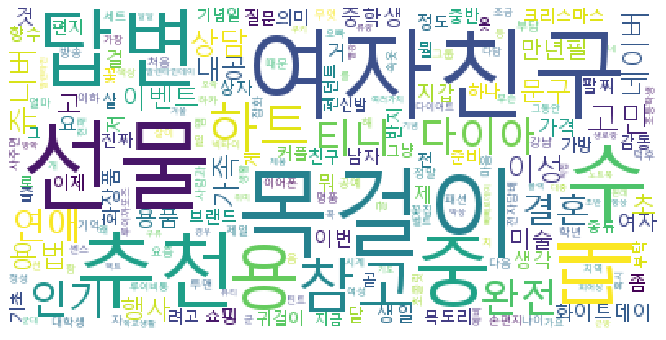

In [123]:
data = gifts.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [126]:
mask = np.array(Image.open('./data/wc5.heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [130]:
data = gifts.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

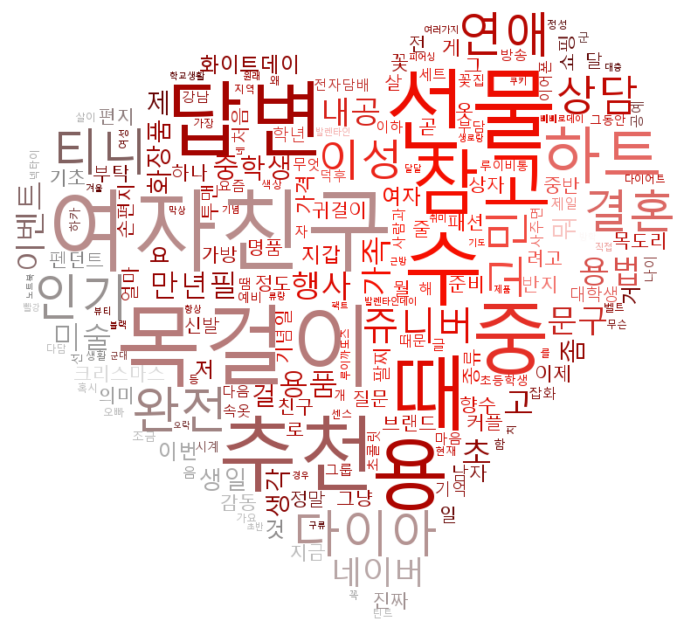

In [131]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()